# Importing All the required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

# Reading the Datafile

In [ ]:
df=pd.read_csv("Dataset.csv")
df['Property_Area'] = df['Property_Area'].replace({'Rural': '1'})
df['Property_Area'] = df['Property_Area'].replace({'Urban': '2'})
df['Property_Area'] = df['Property_Area'].replace({'Semiurban': '3'})

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,2
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,2
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,2
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,2
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<Axes: >

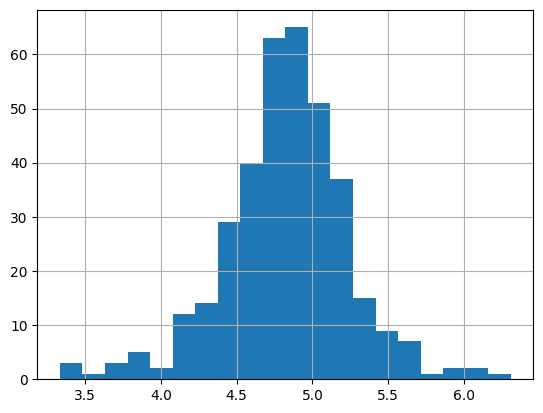

In [ ]:
df["loanAmount_log"]=np.log(df["LoanAmount"])
df["loanAmount_log"].hist(bins=20)

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
loanAmount_log        5
dtype: int64

<Axes: >

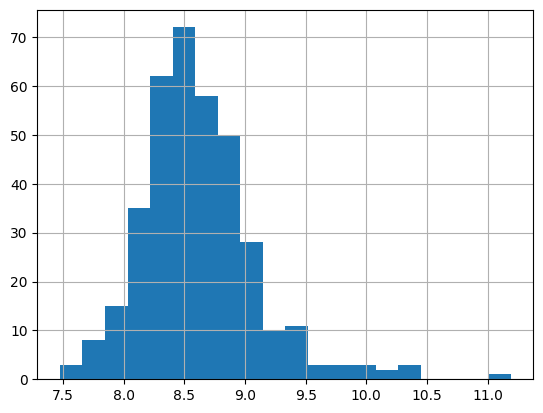

In [ ]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace =True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace =True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace =True)

df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log=df.loanAmount_log.fillna(df.loanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [ ]:
x=df.iloc[:,np.r_[1:5,9:12,13:15]].values
y=df.iloc[:,5].values

x

array([['Male', 'Yes', '0', ..., '2', 5720, 8.651724084373843],
       ['Male', 'Yes', '1', ..., '2', 4576, 8.428580533059634],
       ['Male', 'Yes', '2', ..., '2', 6800, 8.824677891164198],
       ...,
       ['Male', 'No', '0', ..., '3', 5243, 8.564649132572534],
       ['Male', 'Yes', '0', ..., '1', 7393, 8.9082888855571],
       ['Male', 'No', '0', ..., '1', 9200, 9.126958763037132]],
      dtype=object)

In [ ]:
y

array(['No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 

In [ ]:
print("per of missing gender is %2f%%" % ((df['Gender'].isnull().sum()/df.shape[0])*100))

per of missing gender is 0.000000%


number of people who take loan as group by gender
Male      297
Female     70
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

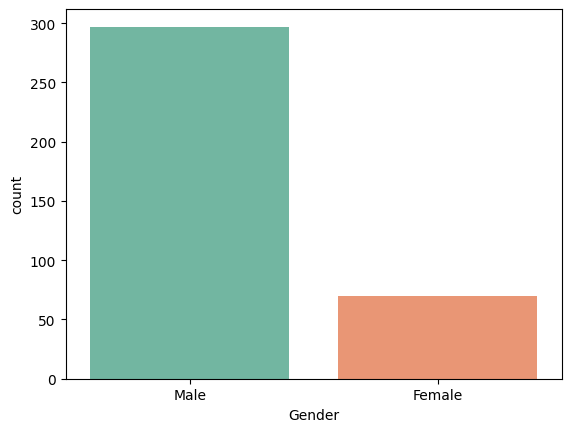

In [ ]:
print("number of people who take loan as group by gender")
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df,palette='Set2')

number of people who take loan as group by marital status
Yes    233
No     134
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

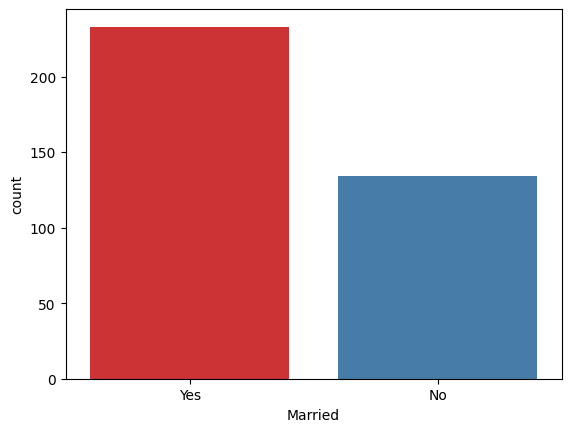

In [ ]:
print("number of people who take loan as group by marital status")
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette='Set1')

number of people who take loan as group by dependents
0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

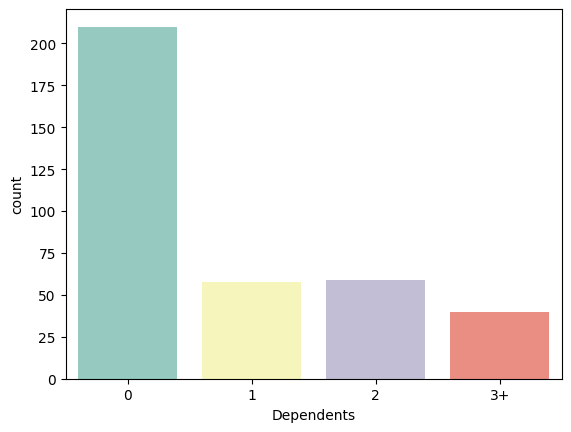

In [ ]:
print("number of people who take loan as group by dependents")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df,palette='Set3')

number of people who take loan as group by selfemployed
No     330
Yes     37
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

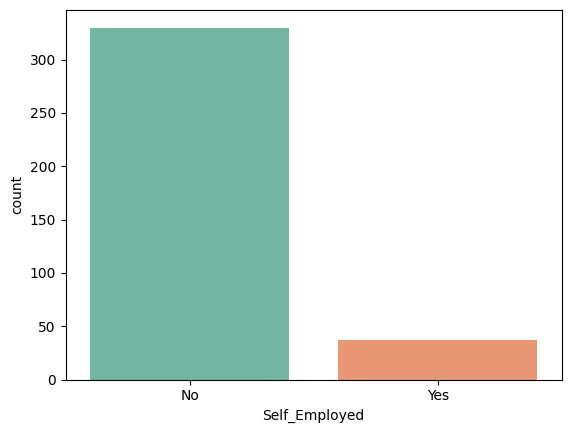

In [ ]:
print("number of people who take loan as group by selfemployed")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df,palette='Set2')

number of people who take loan as group by loanamount
150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
225.0     1
71.0      1
213.0     1
157.0     1
98.0      1
Name: LoanAmount, Length: 145, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

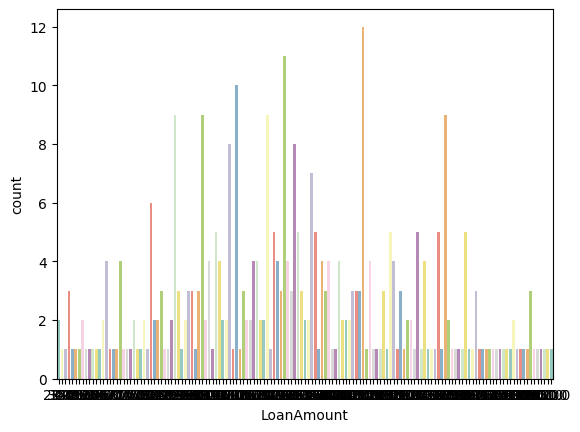

In [ ]:
print("number of people who take loan as group by loanamount")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data=df,palette='Set3')

number of people who take loan as group by credit history
1.0    308
0.0     59
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

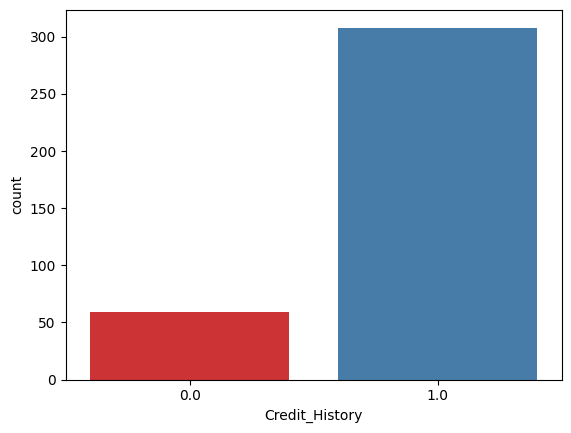

In [ ]:
print("number of people who take loan as group by credit history")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=df,palette='Set1')

In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x=LabelEncoder()

In [ ]:
for i in range(0,5):
  X_train[:,i]=Labelencoder_x.fit_transform(X_train[:,i])
  X_train[:,7]=Labelencoder_x.fit_transform(X_train[:,7])

X_train

array([[0, 0, 0, ..., '1', 41, 8.188966863648876],
       [1, 1, 0, ..., '3', 148, 8.59489469908009],
       [1, 1, 2, ..., '1', 219, 8.922658299524402],
       ...,
       [1, 1, 1, ..., '1', 88, 8.392989587956931],
       [1, 0, 0, ..., '3', 79, 8.356554845453426],
       [1, 1, 0, ..., '1', 139, 8.561210076833012]], dtype=object)

In [ ]:
LabelEncoder_y=LabelEncoder()
y_train=LabelEncoder_y.fit_transform(y_train)

y_train

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0])

In [ ]:
for i in range(0,5):
  X_test[:,i]=LabelEncoder_x.fit_transform(X_test[:,i])
  X_test[:,7]=LabelEncoder_x.fit_transform(X_test[:,7])

X_test

array([[1, 0, 0, 0, 2, 0.0, '2', 10, 8.118505067587098],
       [0, 0, 1, 0, 2, 1.0, '1', 57, 8.769196271411001],
       [1, 1, 0, 0, 2, 1.0, '2', 68, 9.006999447958153],
       [1, 1, 2, 0, 2, 1.0, '2', 47, 8.6328406149422],
       [1, 1, 1, 0, 2, 1.0, '3', 62, 8.91811465947453],
       [1, 0, 0, 1, 2, 1.0, '2', 6, 7.961370201719511],
       [1, 1, 0, 0, 2, 1.0, '1', 43, 8.607764889600624],
       [0, 0, 3, 0, 2, 0.0, '1', 65, 8.940891067785461],
       [1, 0, 0, 0, 3, 1.0, '2', 25, 8.374015421739909],
       [0, 0, 1, 1, 2, 1.0, '3', 0, 7.70796153183549],
       [1, 0, 0, 0, 2, 1.0, '2', 7, 8.047189562170502],
       [1, 1, 3, 0, 1, 1.0, '1', 54, 8.714074899541522],
       [1, 1, 1, 0, 2, 1.0, '1', 73, 9.843737548130354],
       [1, 1, 0, 1, 2, 1.0, '1', 34, 8.494333897270154],
       [1, 1, 2, 0, 2, 1.0, '1', 20, 8.323608442343572],
       [0, 0, 0, 0, 2, 1.0, '2', 2, 7.767263996757308],
       [1, 1, 1, 1, 2, 1.0, '2', 26, 8.379539026117442],
       [0, 1, 0, 0, 3, 0.0, '3', 1, 7.7

In [ ]:
LabelEncoder_y=LabelEncoder()

y_test=LabelEncoder_y.fit_transform(y_test)

y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train= ss.fit_transform(X_train)
x_train= ss.fit_transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
dt=RandomForestClassifier()
dt.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn import metrics
y_pred= dt.predict(X_test)

print("acc of random forest classifier is",metrics.accuracy_score(y_pred,y_test))

y_pred

acc of random forest classifier is 0.8783783783783784


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=kn.predict(X_test)
print("Acc of kn is", metrics.accuracy_score(y_pred,y_test))

Acc of kn is 0.8783783783783784
